In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.optimize import curve_fit
import pandas as pd
%matplotlib inline


In [2]:
def line(x,a,b):
    return a*x + b

def MM(conc,Km,Vmax):
    return (conc*Vmax)/(conc+Km)

[0.15365073 0.00023214] [9.68409934e-02 3.14428661e-05]
[0.46256257 0.00048756] [1.31622310e-01 6.89930622e-05]
[0.57249447 0.00073663] [1.81283197e-01 9.47923315e-05]


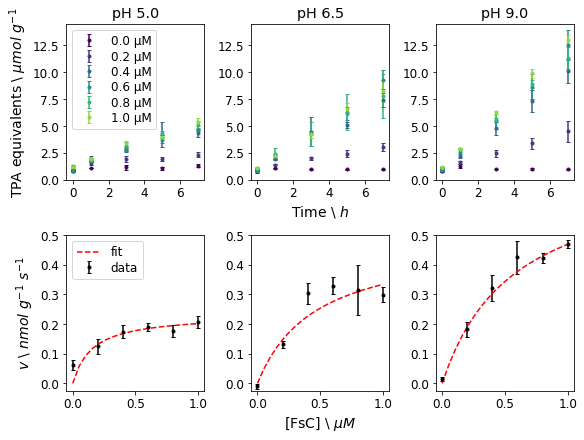

In [10]:
fig, axs = plt.subplots(2,3, constrained_layout=True, figsize=(8,6))
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.size"] = 12
size=6

ymin1 = 0
ymax1 = 14.5

ymin2 = -0.025
ymax2 = 0.0005*1e3

conc = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
model_conc = np.linspace(0,1, num=20)

cols = [1, 3, 5, 7, 9, 11]
cmap = cm.get_cmap('viridis')

df = pd.read_pickle('pH5.pkl')
v0 = []
v0_err = []
for i, (con, col) in enumerate(zip(conc, cols)):
    axs[0,0].errorbar(df['time'], df[df.columns[col]]*0.1, yerr=df[df.columns[col+1]]*0.1, \
                    color=cmap(i/len(conc)), capsize=2, fmt='.', label='{} µM'.format(con))
    popt, pcov = curve_fit(line, df['time'][:3]*3600,df[df.columns[col]][:3]*0.1, sigma=df[df.columns[col+1]][:3]*0.1, absolute_sigma=True)
    v0.append(popt[0])
    v0_err.append(np.sqrt(np.diag(pcov))[0])
v0 = np.array(v0)
v0_err = np.array(v0_err)
axs[0,0].legend(loc='upper left', labelspacing=0.2)
axs[0,0].set_ylabel(r'TPA equivalents \ $µmol$ $g^{-1}$', fontsize='14')
axs[0,0].set_xticks([0,2,4,6])
axs[0,0].set_title('pH 5.0')
axs[0,0].set_ylim(ymin1, ymax1)

axs[1,0].errorbar(conc, v0*1e3, yerr=v0_err*1e3, fmt='.', color='k', capsize=2, label='data')
popt, pcov = curve_fit(MM, conc,v0, sigma=v0_err, absolute_sigma=True)
print(popt, np.sqrt(np.diag(pcov)))
axs[1,0].plot(model_conc, MM(model_conc, *popt)*1e3, 'r--', label='fit')
axs[1,0].set_ylabel(r'$v$ \ $nmol$ $g^{-1}$ $s^{-1}$', fontsize='14')
axs[1,0].set_ylim(ymin2, ymax2)
axs[1,0].legend(loc='upper left', labelspacing=0.2)


df = pd.read_pickle('pH6p5.pkl')
v0 = []
v0_err = []
for i, (con, col) in enumerate(zip(conc, cols)):
    axs[0,1].errorbar(df['time'], df[df.columns[col]]*0.1, yerr=df[df.columns[col+1]]*0.1, color=cmap(i/len(conc)), capsize=2, fmt='.')
    popt, pcov = curve_fit(line, df['time'][:3]*3600,df[df.columns[col]][:3]*0.1, sigma=df[df.columns[col+1]][:3]*0.1, absolute_sigma=True)
    v0.append(popt[0])
    v0_err.append(np.sqrt(np.diag(pcov))[0])
v0 = np.array(v0)
v0_err = np.array(v0_err)

axs[0,1].set_xlabel(r'Time \ $h$', fontsize='14')
axs[0,1].set_xticks([0,2,4,6])
axs[0,1].set_title('pH 6.5')
axs[0,1].set_ylim(ymin1, ymax1)

axs[1,1].errorbar(conc, v0*1e3, yerr=v0_err*1e3, fmt='.', color='k', capsize=2)
popt, pcov = curve_fit(MM, conc,v0, sigma=v0_err, absolute_sigma=True)
print(popt, np.sqrt(np.diag(pcov)))
axs[1,1].plot(model_conc, MM(model_conc, *popt)*1e3, 'r--')
axs[1,1].set_ylim(ymin2, ymax2)
axs[1,1].set_xlabel(r'[FsC] \ $µM$', fontsize='14')

df = pd.read_pickle('pH9.pkl')
v0 = []
v0_err = []
for i, (con, col) in enumerate(zip(conc, cols)):
    axs[0,2].errorbar(df['time'], df[df.columns[col]]*0.1, yerr=df[df.columns[col+1]]*0.1, color=cmap(i/len(conc)), capsize=2, fmt='.')
    popt, pcov = curve_fit(line, df['time'][:3]*3600,df[df.columns[col]][:3]*0.1, sigma=df[df.columns[col+1]][:3]*0.1, absolute_sigma=True)
    v0.append(popt[0])
    v0_err.append(np.sqrt(np.diag(pcov))[0])
v0 = np.array(v0)
v0_err = np.array(v0_err)

axs[0,2].set_xticks([0,2,4,6])
axs[0,2].set_title('pH 9.0')
axs[0,2].set_ylim(ymin1, ymax1)

axs[1,2].errorbar(conc, v0*1e3, yerr=v0_err*1e3, fmt='.', color='k', capsize=2)
popt, pcov = curve_fit(MM, conc,v0, sigma=v0_err, absolute_sigma=True)
print(popt, np.sqrt(np.diag(pcov)))
axs[1,2].plot(model_conc, MM(model_conc, *popt)*1e3, 'r--')
axs[1,2].set_ylim(ymin2, ymax2)

plt.savefig('assay.png', dpi=300)

In [42]:

popt, pcov = curve_fit(line, df['time'][:3],df[df.columns[col]][:3])
print(popt)

[16.93734336 11.67418546]


In [4]:
df

,time,0 μM FsC,0 μM FsC std,0.2 μM FsC,0.2 μM FsC std,0.4 μM FsC,0.4 μM FsC std,0.6 μM FsC,0.6 μM FsC std,0.8 μM FsC,0.8 μM FsC std,1 μM FsC,1 μM FsC std
0,0,7.780702,0.751217,7.938596,0.709171,10.921053,1.178707,9.166667,0.325154,11.254386,0.293303,11.771930,0.766629
1,1,12.710526,1.613272,16.026316,1.195624,21.684211,1.908495,25.535088,4.242858,28.614035,1.191111,28.464912,1.335870
2,3,9.938596,0.384567,24.350877,3.496932,47.631579,5.807839,54.131579,6.589197,55.254386,1.916340,62.535088,1.252145
3,5,10.052632,0.701645,33.929825,5.149071,73.000000,9.950346,86.622807,11.937091,88.868421,4.020741,98.947368,4.166898
4,7,9.622807,0.378517,44.973684,9.591888,100.815789,10.984341,125.105263,13.775025,113.140351,10.144205,129.605263,4.621217


1 uM = 1 umol/L

umol/g substrate = (uM * L)/g substrate

In [7]:
for col in df.columns[1:]:
    umol_per_g = df[col]*600e-6 / (6e-3)
    print(umol_per_g)
    break

0    0.778070
1    1.271053
2    0.993860
3    1.005263
4    0.962281
Name: 0 μM FsC, dtype: float64


1 h = 3600 s